For any questions contact me at filip.tomas@fer.hr

# Data visualization
  
In the third laboratory exercise, we will introduce you to two libraries for data visualization - matplotlib and seaborn. We will use the data set we created as part of the second lab exercise, i.e. Titanic, with the new features we created.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv('our_titanic.csv')

In [3]:
X.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'AgeBand',
       'Age*Pclass', 'FamilySize', 'IsAlone'], dtype=object)

# Matplotlib.pyplot
Below we will introduce you to the main graphs and functionalities of the matplotlib.pyplot library

### Histogram
Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

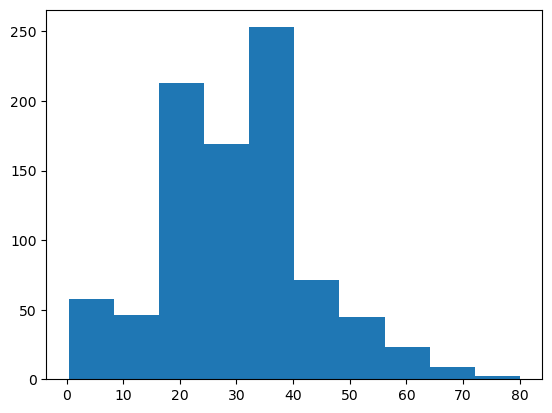

In [4]:
plt.hist(X.Age)
plt.show()

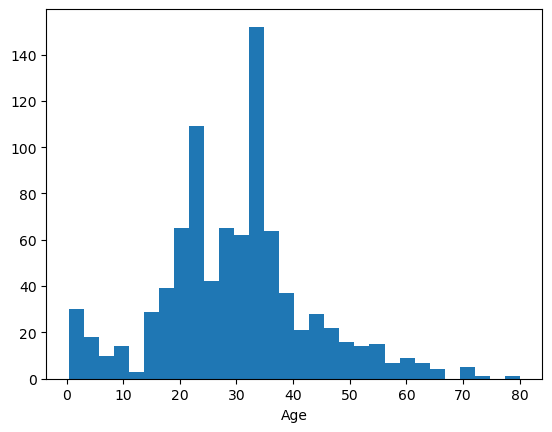

In [5]:
plt.hist(X.Age, bins=30)
plt.xlabel('Age')
plt.show()

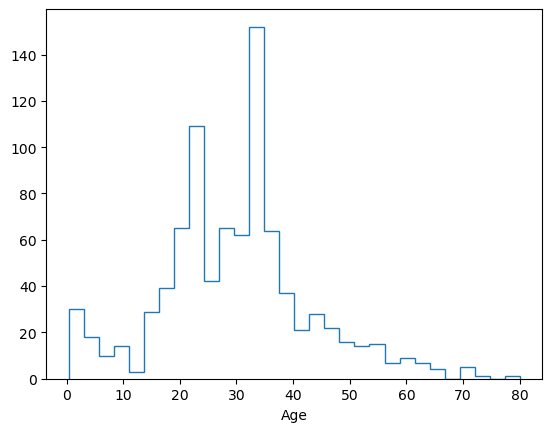

In [6]:
plt.hist(X.Age, bins=30, histtype='step')
plt.xlabel('Age')
plt.show()

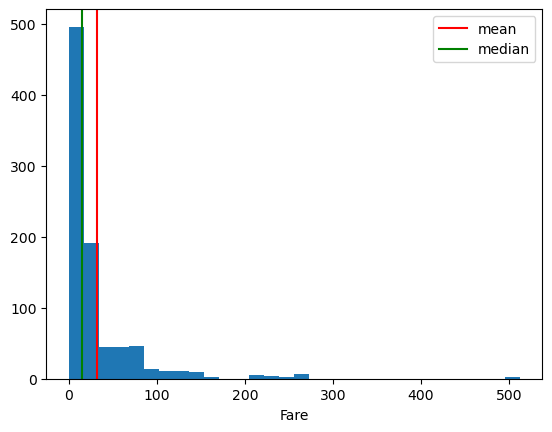

In [7]:
plt.hist(X.Fare, bins=30)
plt.axvline(X.Fare.mean(), color = 'red', label = "mean")
plt.axvline(X.Fare.median(), color = 'green', label = "median")
plt.xlabel('Fare')
plt.legend()
plt.show()

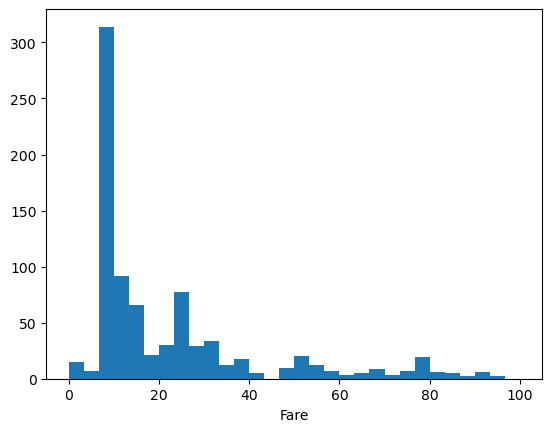

In [8]:
plt.hist(X.Fare, bins=30, range=(0,100))
plt.xlabel('Fare')
plt.show()

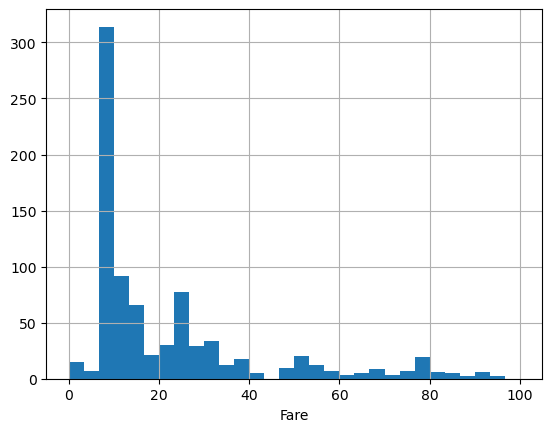

In [9]:
plt.hist(X.Fare, bins=30, range=(0,100))
plt.xlabel('Fare')
plt.grid()
plt.show()

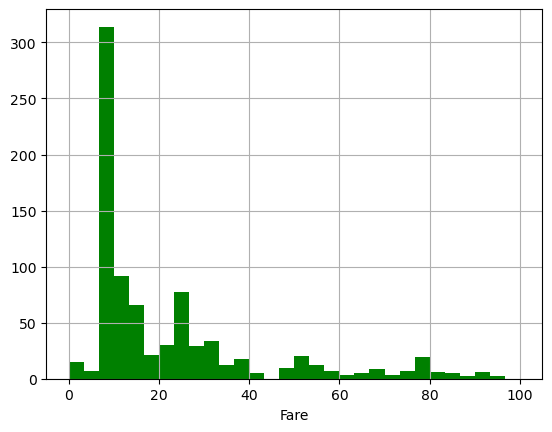

In [10]:
plt.hist(X.Fare, bins=30, range=(0,100), color='green')
plt.xlabel('Fare')
plt.grid()
plt.show()

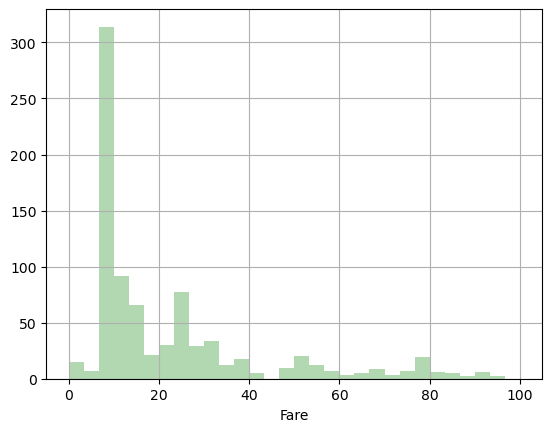

In [11]:
plt.hist(X.Fare, bins=30, range=(0,100), color='green', alpha=0.3)
plt.xlabel('Fare')
plt.grid()
plt.show()

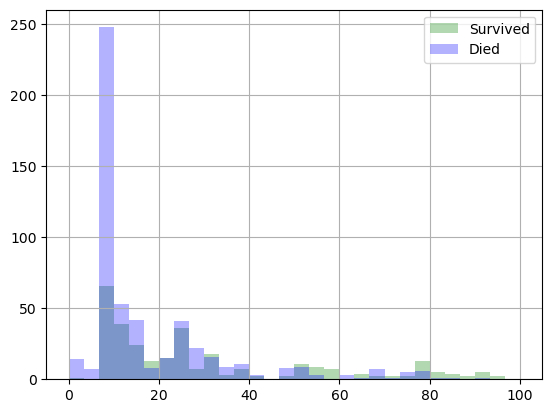

In [12]:
plt.hist(X[X.Survived == 1].Fare, bins=30, range=(0,100), label='Survived', color='green', alpha=0.3)
plt.hist(X[X.Survived == 0].Fare, bins=30, range=(0,100), label='Died', color='blue', alpha=0.3)
plt.legend(loc='best')
plt.grid()
plt.show()

### Colors in matplotlib
Documentation: https://matplotlib.org/stable/api/colors_api.html#module-matplotlib.colors  
List of all named colors: https://matplotlib.org/stable/gallery/color/named_colors.html  
  
The alpha attribute can be from the interval [0, 1] and represents color transparency.
The above two examples show the change in color parameters and alpha attributes.

### Pie chart
Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

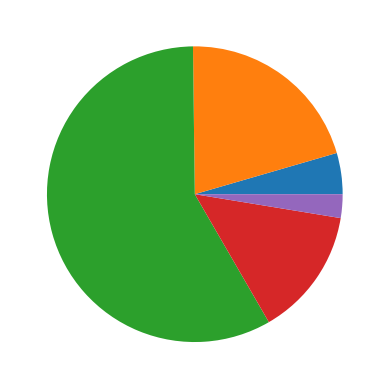

In [13]:
count_per_title = X.groupby('Title').count().loc[:,'Name'].values
percent = (count_per_title/len(X))*100

plt.pie(percent)
plt.show()

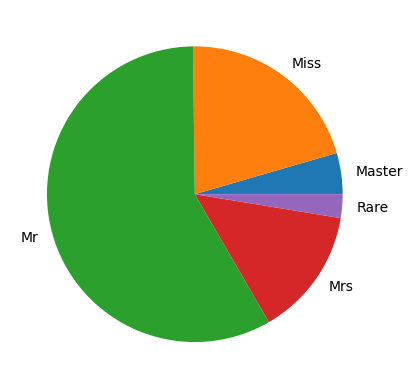

In [14]:
count_per_title = X.groupby('Title').count().loc[:,'Name'].values
title_name = X.groupby('Title').count().index.values
percent = (count_per_title/len(X))*100

plt.pie(percent, labels=title_name)
plt.show()

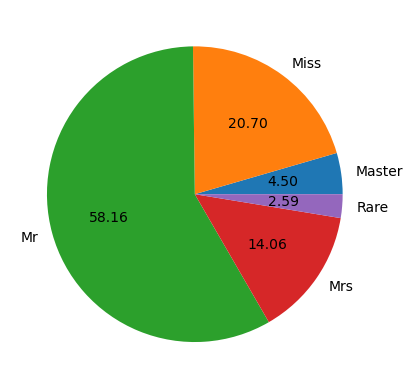

In [15]:
count_per_title = X.groupby('Title').count().loc[:,'Name'].values
title_name = X.groupby('Title').count().index.values

plt.pie(count_per_title, labels=title_name, autopct='%.2f')
plt.show()

### Column chart
Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

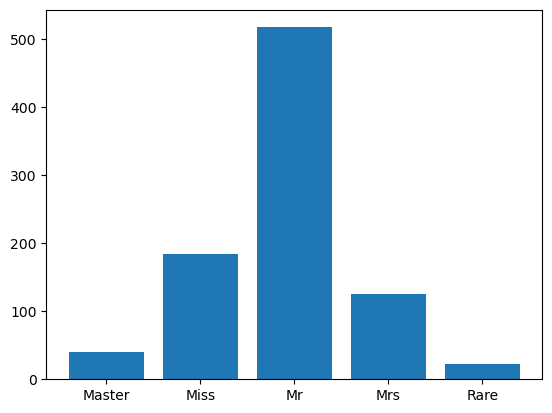

In [16]:
count_per_title = X.groupby('Title').count().loc[:,'Name'].values
title_name = X.groupby('Title').count().index.values

plt.bar(title_name, count_per_title)
plt.show()

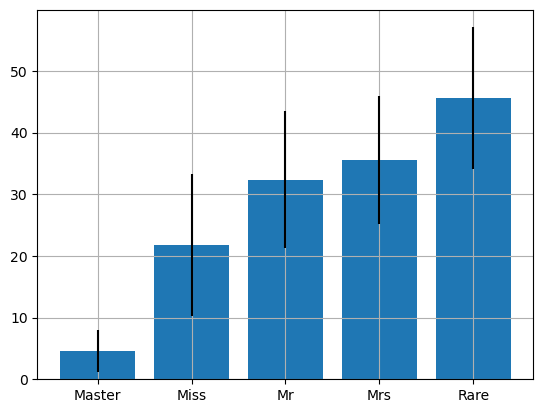

In [17]:
# data
master_mean = X.loc[X.loc[:,'Title'] == 'Master', 'Age'].mean()
master_std = X.loc[X.loc[:,'Title'] == 'Master', 'Age'].std()
miss_mean = X.loc[X.loc[:,'Title'] == 'Miss', 'Age'].mean()
miss_std = X.loc[X.loc[:,'Title'] == 'Miss', 'Age'].std()
mr_mean = X.loc[X.loc[:,'Title'] == 'Mr', 'Age'].mean()
mr_std = X.loc[X.loc[:,'Title'] == 'Mr', 'Age'].std()
mrs_mean = X.loc[X.loc[:,'Title'] == 'Mrs', 'Age'].mean()
mrs_std = X.loc[X.loc[:,'Title'] == 'Mrs', 'Age'].std()
rare_mean = X.loc[X.loc[:,'Title'] == 'Rare', 'Age'].mean()
rare_std = X.loc[X.loc[:,'Title'] == 'Rare', 'Age'].std()

age_per_title = [master_mean, miss_mean, mr_mean, mrs_mean, rare_mean]
age_per_title_std = [master_std, miss_std, mr_std, mrs_std, rare_std]

title_name = X.groupby('Title').count().index.values

# plot
plt.bar(title_name, age_per_title, yerr=age_per_title_std)
plt.grid()
plt.show()

### Stacked chart

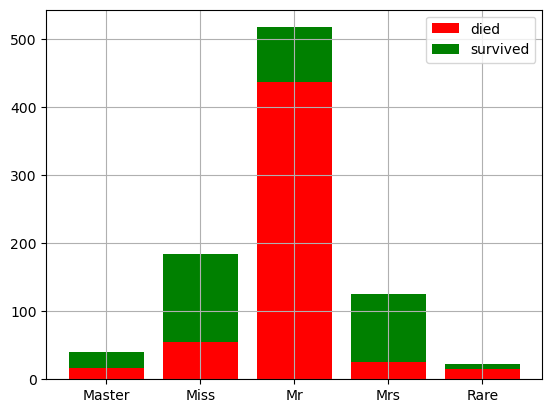

In [18]:
# mask
mask_survived = X.Survived == 1

count_per_title_died = X.loc[~mask_survived,:].groupby('Title').count().loc[:,'Name'].values
count_per_title_survived = X.loc[mask_survived,:].groupby('Title').count().loc[:,'Name'].values
title_name = X.groupby('Title').count().index.values

# plot
plt.bar(title_name, count_per_title_died, color='red', label='died')
plt.bar(title_name, count_per_title_survived, color='green', label='survived', bottom=count_per_title_died)
plt.legend(loc='best')
plt.grid()
plt.show()

### Box plot
Documentation: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

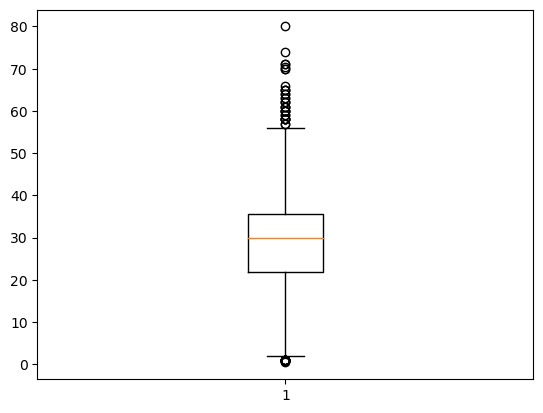

In [19]:
plt.boxplot(X.Age)
plt.show()

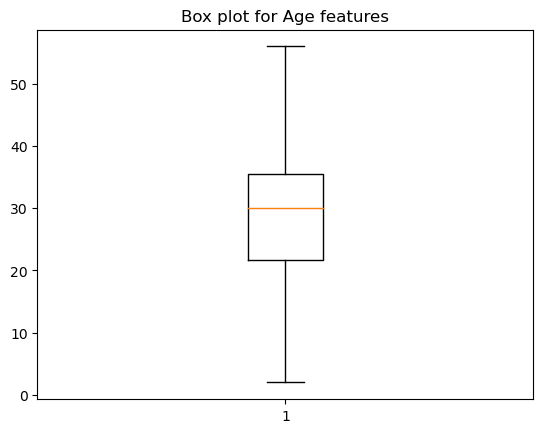

In [20]:
plt.boxplot(X.Age, showfliers=False)
plt.title('Box plot for Age features')
plt.show()

### Line chart
Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

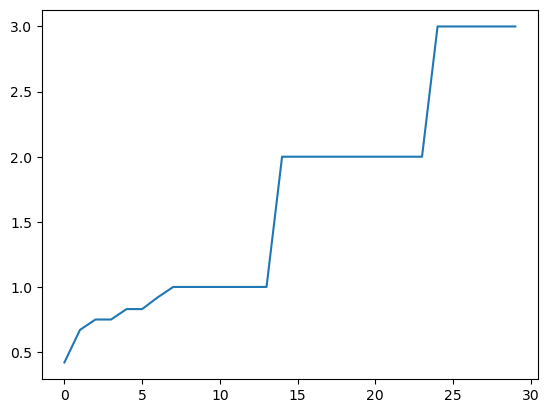

In [21]:
# show 30 youngest passengers
X_tmp = X.copy()
sorted_age = X_tmp.sort_values(by=['Age']).Age.values[:30]
person = [x for x in range(30)]

# plot
plt.plot(person, sorted_age)
plt.show()

List of additional attributes that can be passed to the line chart: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D  
  
Let's show some of them.

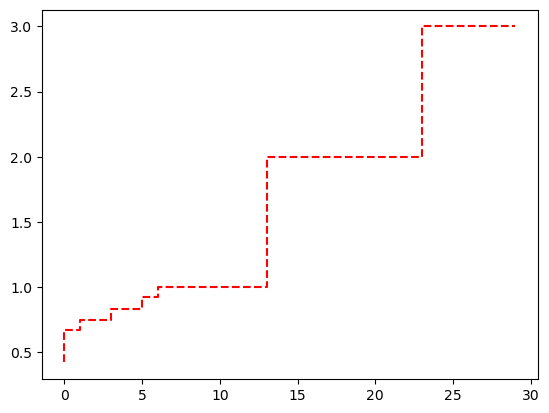

In [22]:
# show 30 youngest passengers
sorted_age = X_tmp.sort_values(by=['Age']).Age.values[:30]
person = [x for x in range(30)]

# plot
plt.plot(person, sorted_age, c='r', linestyle='--', ds='steps')
plt.show()

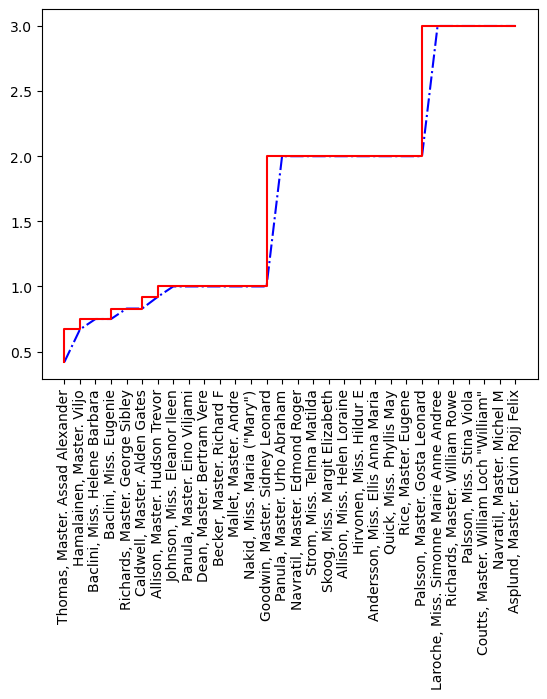

In [23]:
# show 30 youngest passengers# show 30 youngest passengers
sorted_age = X_tmp.sort_values(by=['Age']).Age.values[:30]
names = X_tmp.sort_values(by=['Age']).Name.values[:30]

# plot
plt.plot(names, sorted_age, c='b', linestyle='-.')
plt.plot(names, sorted_age, c='r', ds='steps')
plt.xticks(rotation=90)
plt.show()

### Scatter plot
Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

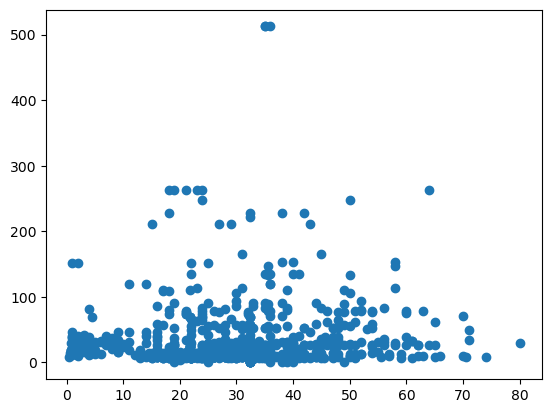

In [24]:
plt.scatter(X.Age, X.Fare)
plt.show()

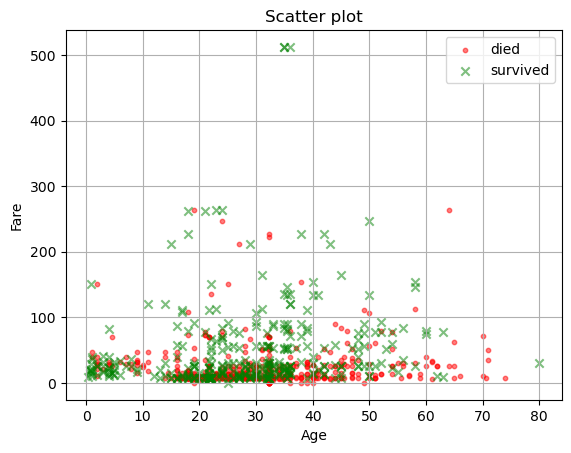

In [25]:
# mask
mask_survived = X.Survived == 1

# plot
plt.scatter(X.loc[~mask_survived,'Age'], X.loc[~mask_survived,'Fare'], s=10, alpha=0.5, c='r', label='died')
plt.scatter(X.loc[mask_survived,'Age'], X.loc[mask_survived,'Fare'], alpha=0.5, marker='x', c='g', label='survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter plot')
plt.grid()
plt.legend(loc='best')
plt.show()

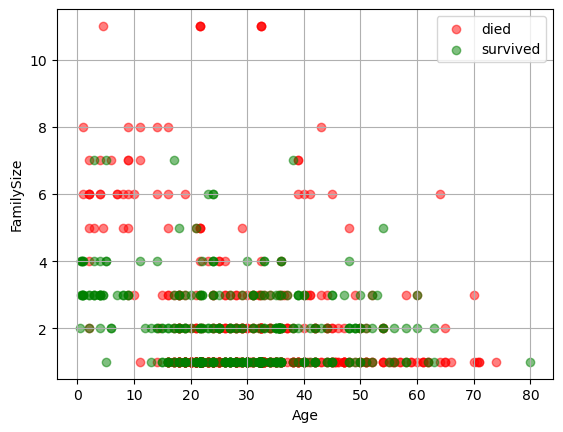

In [26]:
# mask
mask_survived = X.Survived == 1

# plot
plt.scatter(X.loc[~mask_survived,'Age'], X.loc[~mask_survived,'FamilySize'], alpha=0.5, c='r', label='died')
plt.scatter(X.loc[mask_survived,'Age'], X.loc[mask_survived,'FamilySize'], alpha=0.5, c='g', label='survived')
plt.xlabel('Age')
plt.ylabel('FamilySize')
plt.legend(loc='best')
plt.grid()
plt.show()

### Bubble chart
This is done by using a scatter plot and specifying the attribute "s" (size).

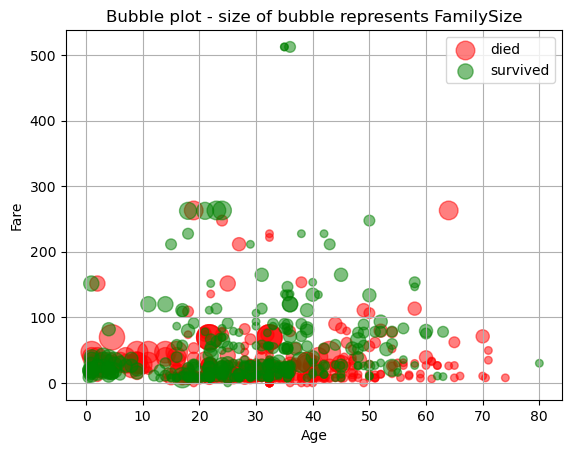

In [27]:
# mask
mask_survived = X.Survived == 1

# sizes
sizes = X.FamilySize*30

# plot
plt.scatter(X.loc[~mask_survived,'Age'], X.loc[~mask_survived,'Fare'], s=sizes[~mask_survived], alpha=0.5, c='r', label='died')
plt.scatter(X.loc[mask_survived,'Age'], X.loc[mask_survived,'Fare'], s=sizes[mask_survived], alpha=0.5, c='g', label='survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Bubble plot - size of bubble represents FamilySize')
plt.grid()
plt.legend(loc='best')
plt.show()

### Multiple graphs in the same view - subplot
Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

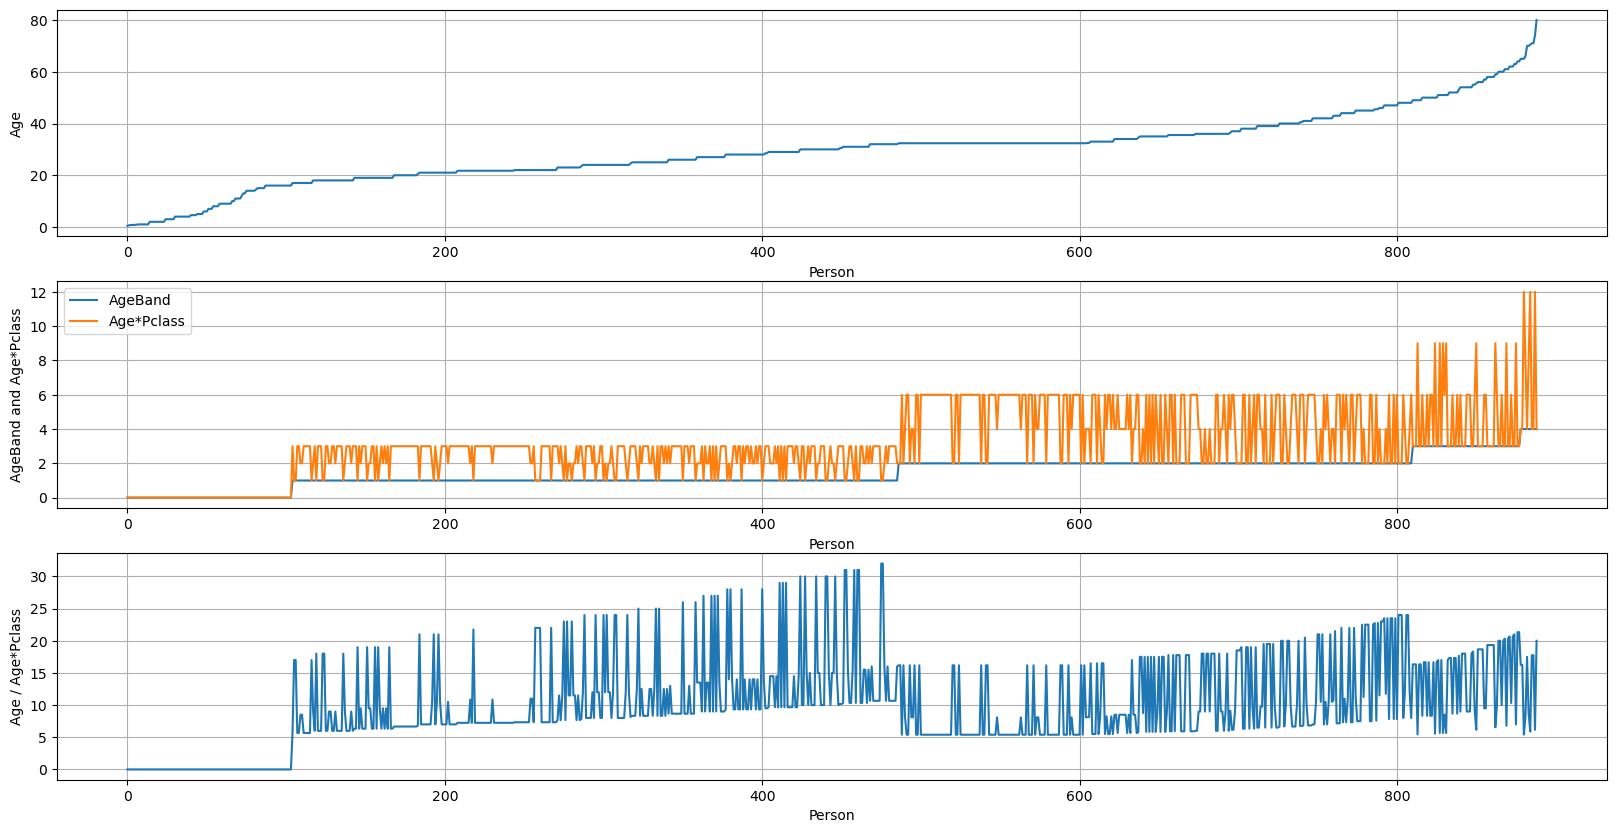

In [28]:
# data
X_tmp = X.copy()
X_tmp = X_tmp.sort_values(by=['Age'])

# plot

# define axises
fig, ax = plt.subplots(3,1, figsize=(20,10)) 

# fill axis 0
ax[0].plot([x for x in range(len(X_tmp))], X_tmp.Age)
ax[0].grid()
ax[0].set_ylabel('Age')
ax[0].set_xlabel('Person')

# fill axis 1
ax[1].plot([x for x in range(len(X_tmp))], X_tmp.AgeBand, label='AgeBand')
ax[1].plot([x for x in range(len(X_tmp))], X_tmp.loc[:,'Age*Pclass'], label='Age*Pclass')
ax[1].grid()
ax[1].legend(loc='best')
ax[1].set_ylabel('AgeBand and Age*Pclass')
ax[1].set_xlabel('Person')

# fill axis 2
ax[2].plot([x for x in range(len(X_tmp))],  np.where(X_tmp.loc[:,'Age*Pclass']== 0, 0, X_tmp.Age / X_tmp.loc[:,'Age*Pclass']))
ax[2].grid()
ax[2].set_ylabel('Age / Age*Pclass')
ax[2].set_xlabel('Person')

plt.show()

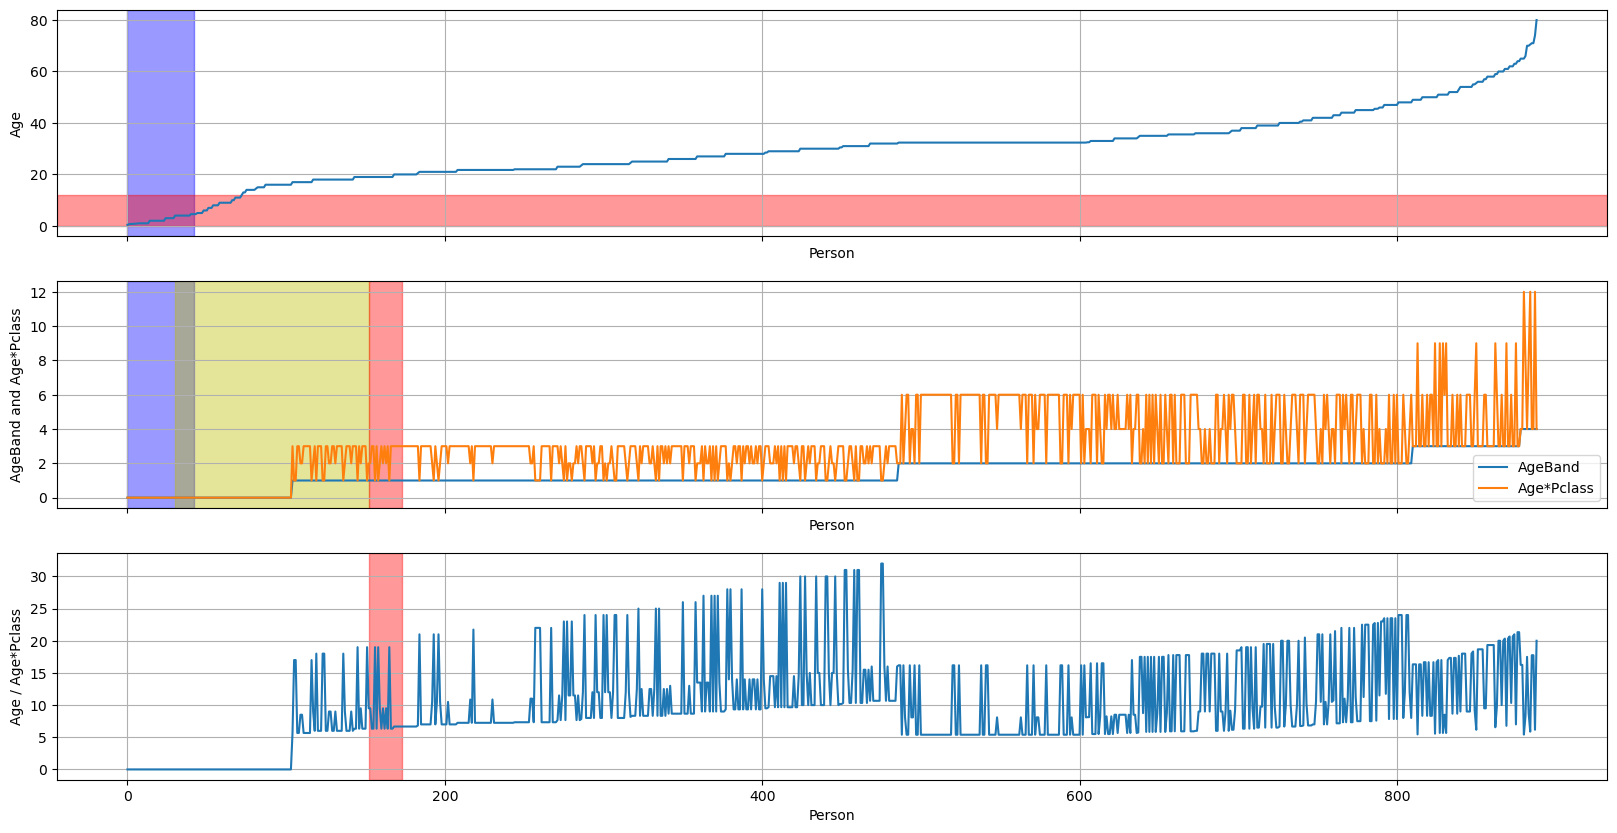

In [29]:
# define axes
fig, ax = plt.subplots(3,1, figsize=(20,10), sharex = True) 

# plot to axis 0
ax[0].plot([x for x in range(len(X_tmp))], X_tmp.Age)
ax[0].grid()
ax[0].set_ylabel('Age')
ax[0].set_xlabel('Person')

# plot to axis 1
ax[1].plot([x for x in range(len(X_tmp))], X_tmp.AgeBand, label='AgeBand')
ax[1].plot([x for x in range(len(X_tmp))], X_tmp.loc[:,'Age*Pclass'], label='Age*Pclass')
ax[1].grid()
ax[1].legend(loc='best')
ax[1].set_ylabel('AgeBand and Age*Pclass')
ax[1].set_xlabel('Person')

# plot to axis 2
ax[2].plot([x for x in range(len(X_tmp))], np.where(X_tmp.loc[:,'Age*Pclass']== 0, 0, X_tmp.Age / X_tmp.loc[:,'Age*Pclass']))
ax[2].grid()
ax[2].set_ylabel('Age / Age*Pclass')
ax[2].set_xlabel('Person')

# fill (random) area
ax[0].axvspan(0, 42, color='b', alpha=0.4)
ax[0].axhspan(0, 12, color='r', alpha=0.4)
ax[1].axvspan(0, 42, color='b', alpha=0.4)
ax[1].axvspan(30, 152, color='y', alpha=0.4)
ax[1].axvspan(152, 173, color='r', alpha=0.4)
ax[2].axvspan(152, 173, color='r', alpha=0.4)

plt.show()

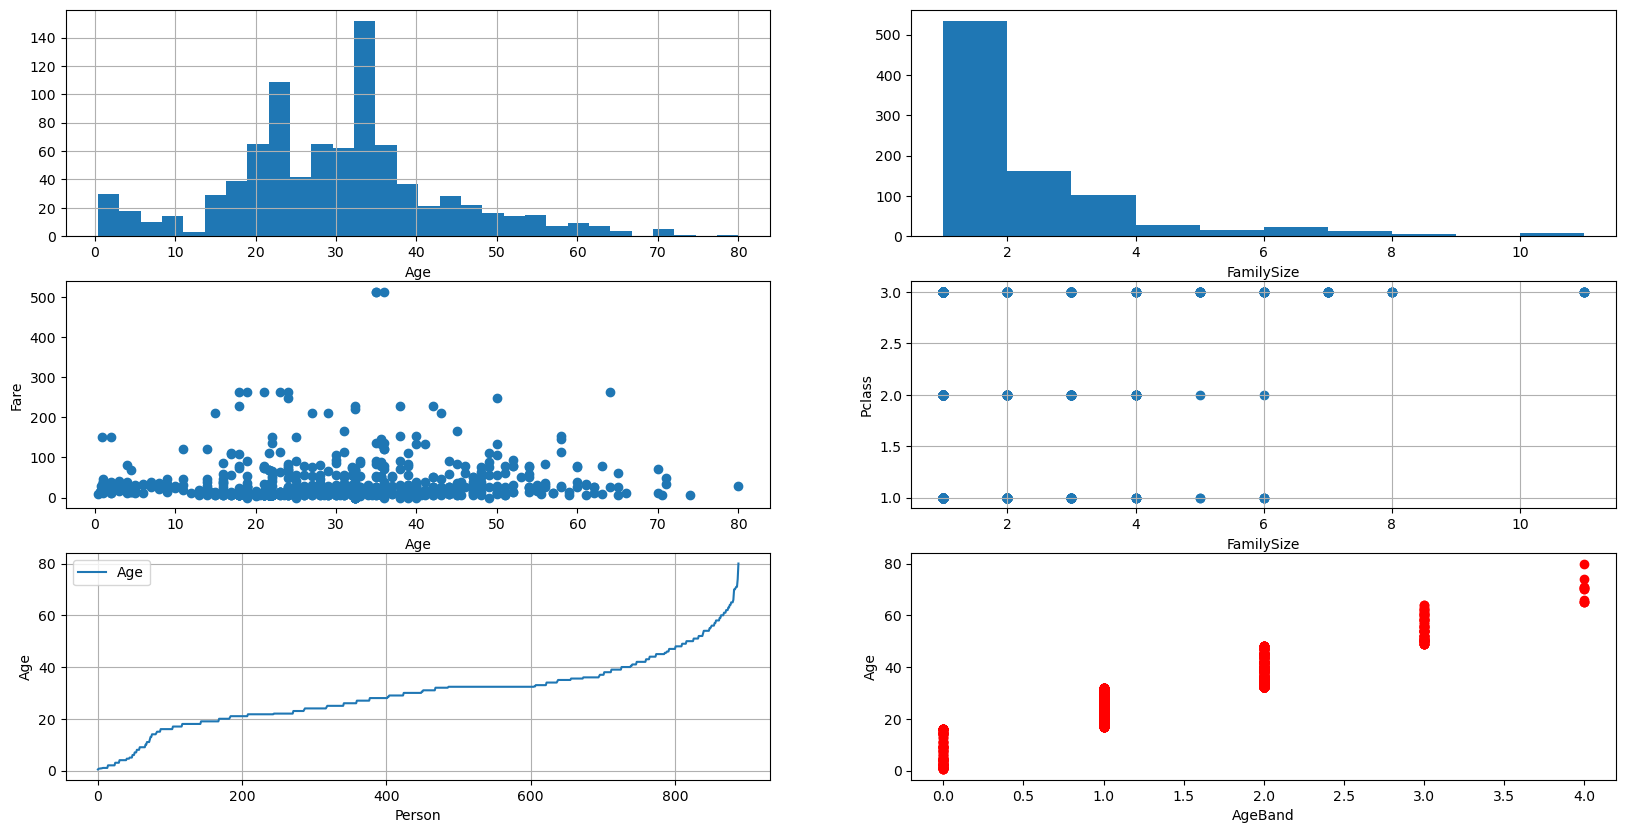

In [30]:
# define axes
fig, ax = plt.subplots(3,2, figsize=(20,10)) 

ax[0,0].hist(X_tmp.Age, bins=30)
ax[0,0].grid()
ax[0,0].set_xlabel('Age')

ax[1,0].scatter(X_tmp.Age, X_tmp.Fare)
ax[1,0].set_xlabel('Age')
ax[1,0].set_ylabel('Fare')

ax[2,0].plot([x for x in range(len(X_tmp))], X_tmp.Age, label='Age')
ax[2,0].set_ylabel('Age')
ax[2,0].set_xlabel('Person')
ax[2,0].legend(loc='best')
ax[2,0].grid()

ax[0,1].hist(X_tmp.FamilySize)
ax[0,1].set_xlabel('FamilySize')

ax[1,1].scatter(X_tmp.FamilySize, X_tmp.Pclass)
ax[1,1].set_xlabel('FamilySize')
ax[1,1].set_ylabel('Pclass')
ax[1,1].grid()

ax[2,1].scatter(X_tmp.AgeBand, X_tmp.Age, color='r')
ax[2,1].set_xlabel('AgeBand')
ax[2,1].set_ylabel('Age')

plt.show()

### 3D 
As part of this exercise, we will not show examples of 3D graphs. For those interested in 3D graphs, please see: https://matplotlib.org/stable/gallery/index.html#mplot3d-examples-index

### Additional examples
For those who want to know more, we recommend the official tutorials - https://matplotlib.org/stable/tutorials/index.html

# Seaborn
Matplotlib-based visualization library. Matplotlib can do everything Seaborn can (and much more than that), but Seaborn requires fewer lines of code for the same result. 
Documentation: https://seaborn.pydata.org/

### Heatmap
Documentation: https://seaborn.pydata.org/generated/seaborn.heatmap.html

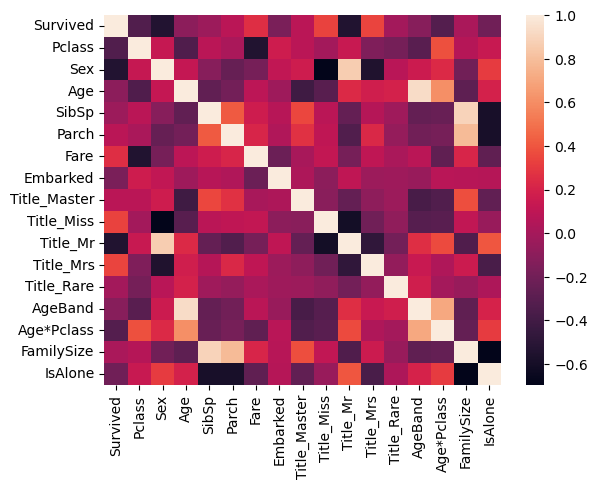

In [31]:
X_numeric = X.loc[:,~X.columns.isin(['Name', 'Ticket', 'Cabin', 'Title'])]
sns.heatmap(X_numeric.corr())
plt.show()

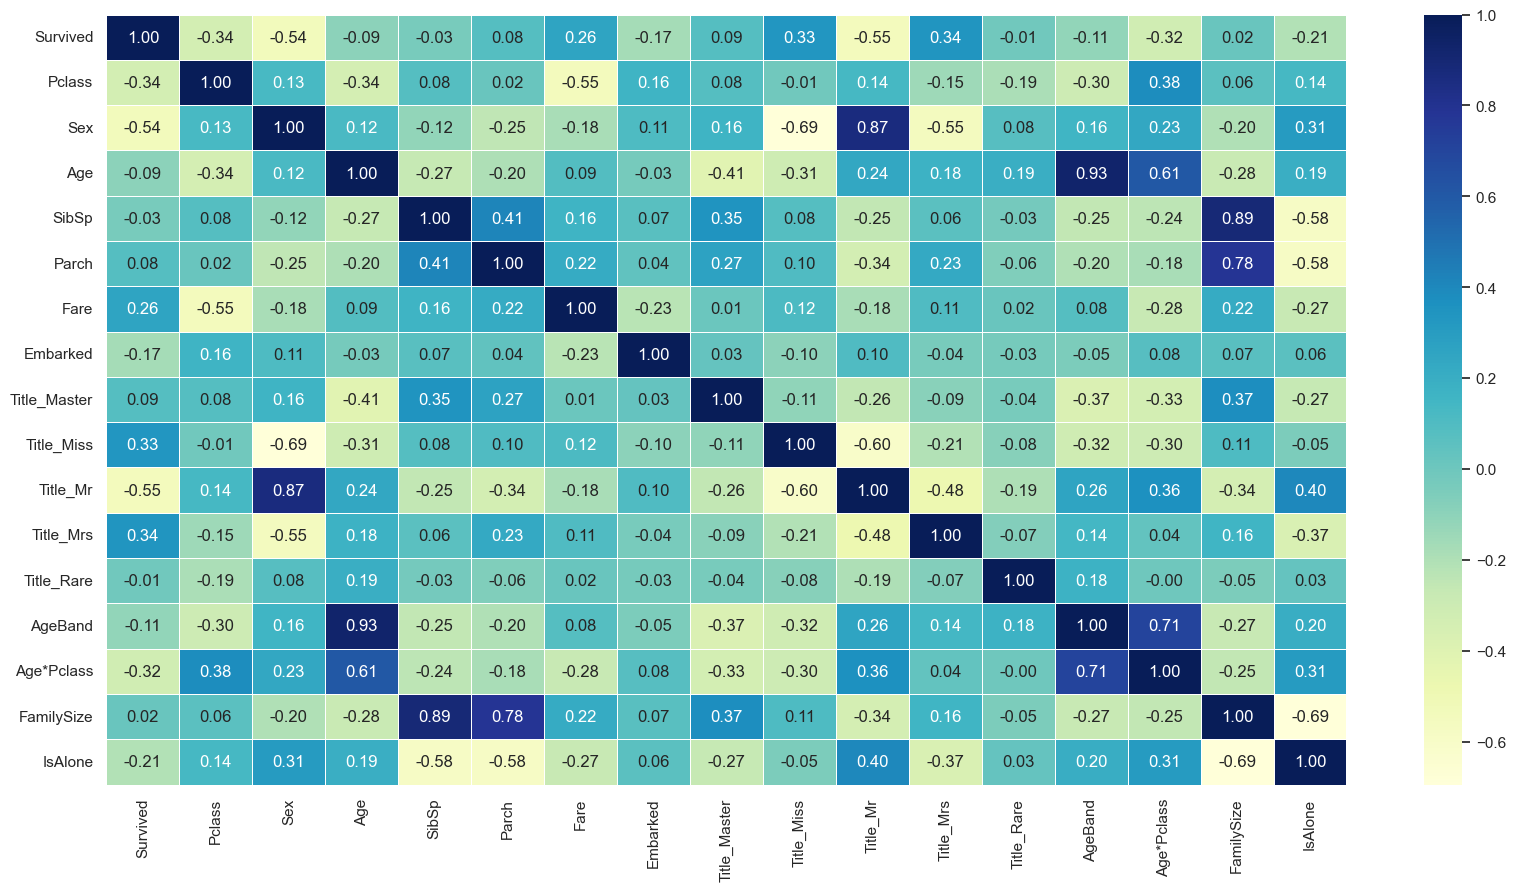

In [32]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X_numeric.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()

When using Seaborn, we can make a graph of the heat map using just one line of code, and on the following link you can see examples of how many lines of code are needed for the same job using Matplotlib - https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

### Scatter plot matrix
Documentation: https://seaborn.pydata.org/generated/seaborn.pairplot.html

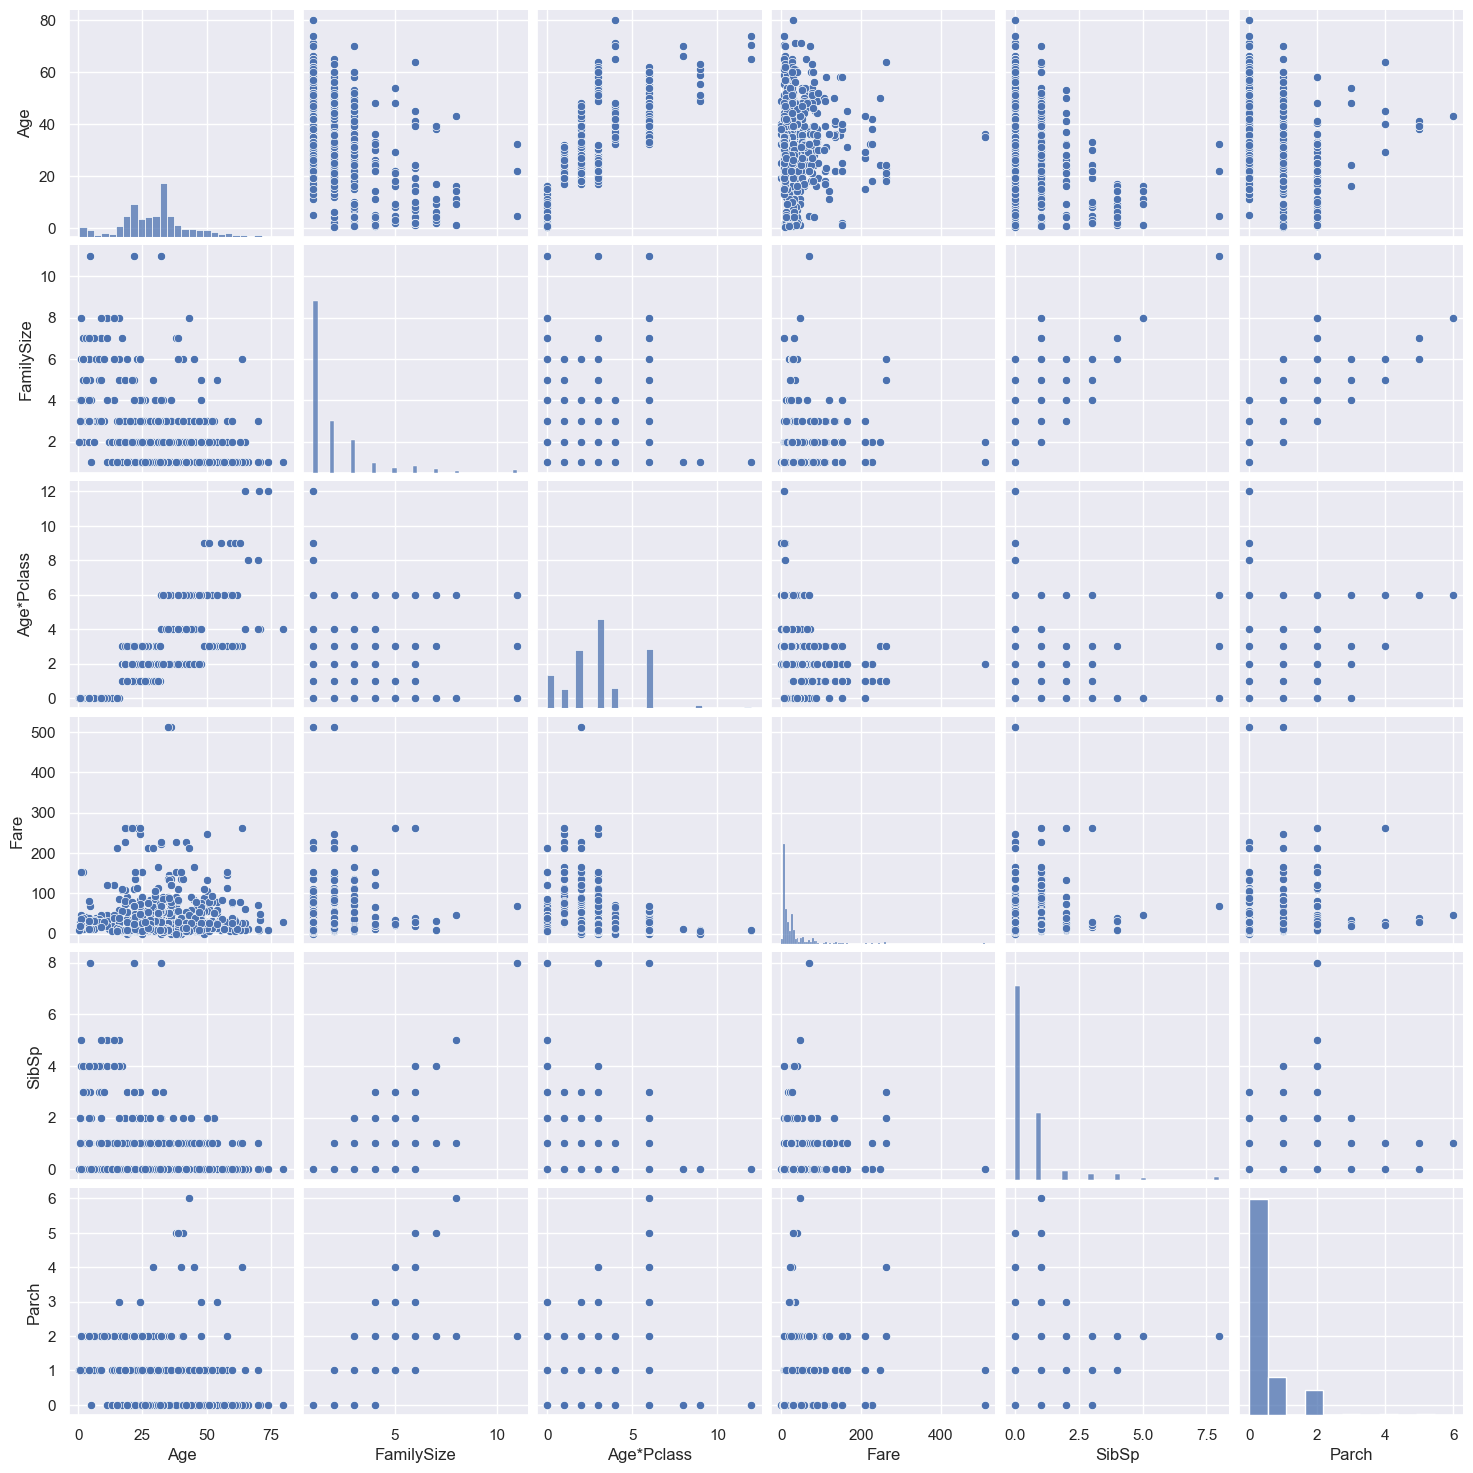

In [33]:
sns.set(rc={'figure.figsize':(25,15)})
sns.pairplot(X.loc[:,['Age', 'FamilySize', 'Age*Pclass', 'Fare', 'SibSp', 'Parch']])
plt.show()

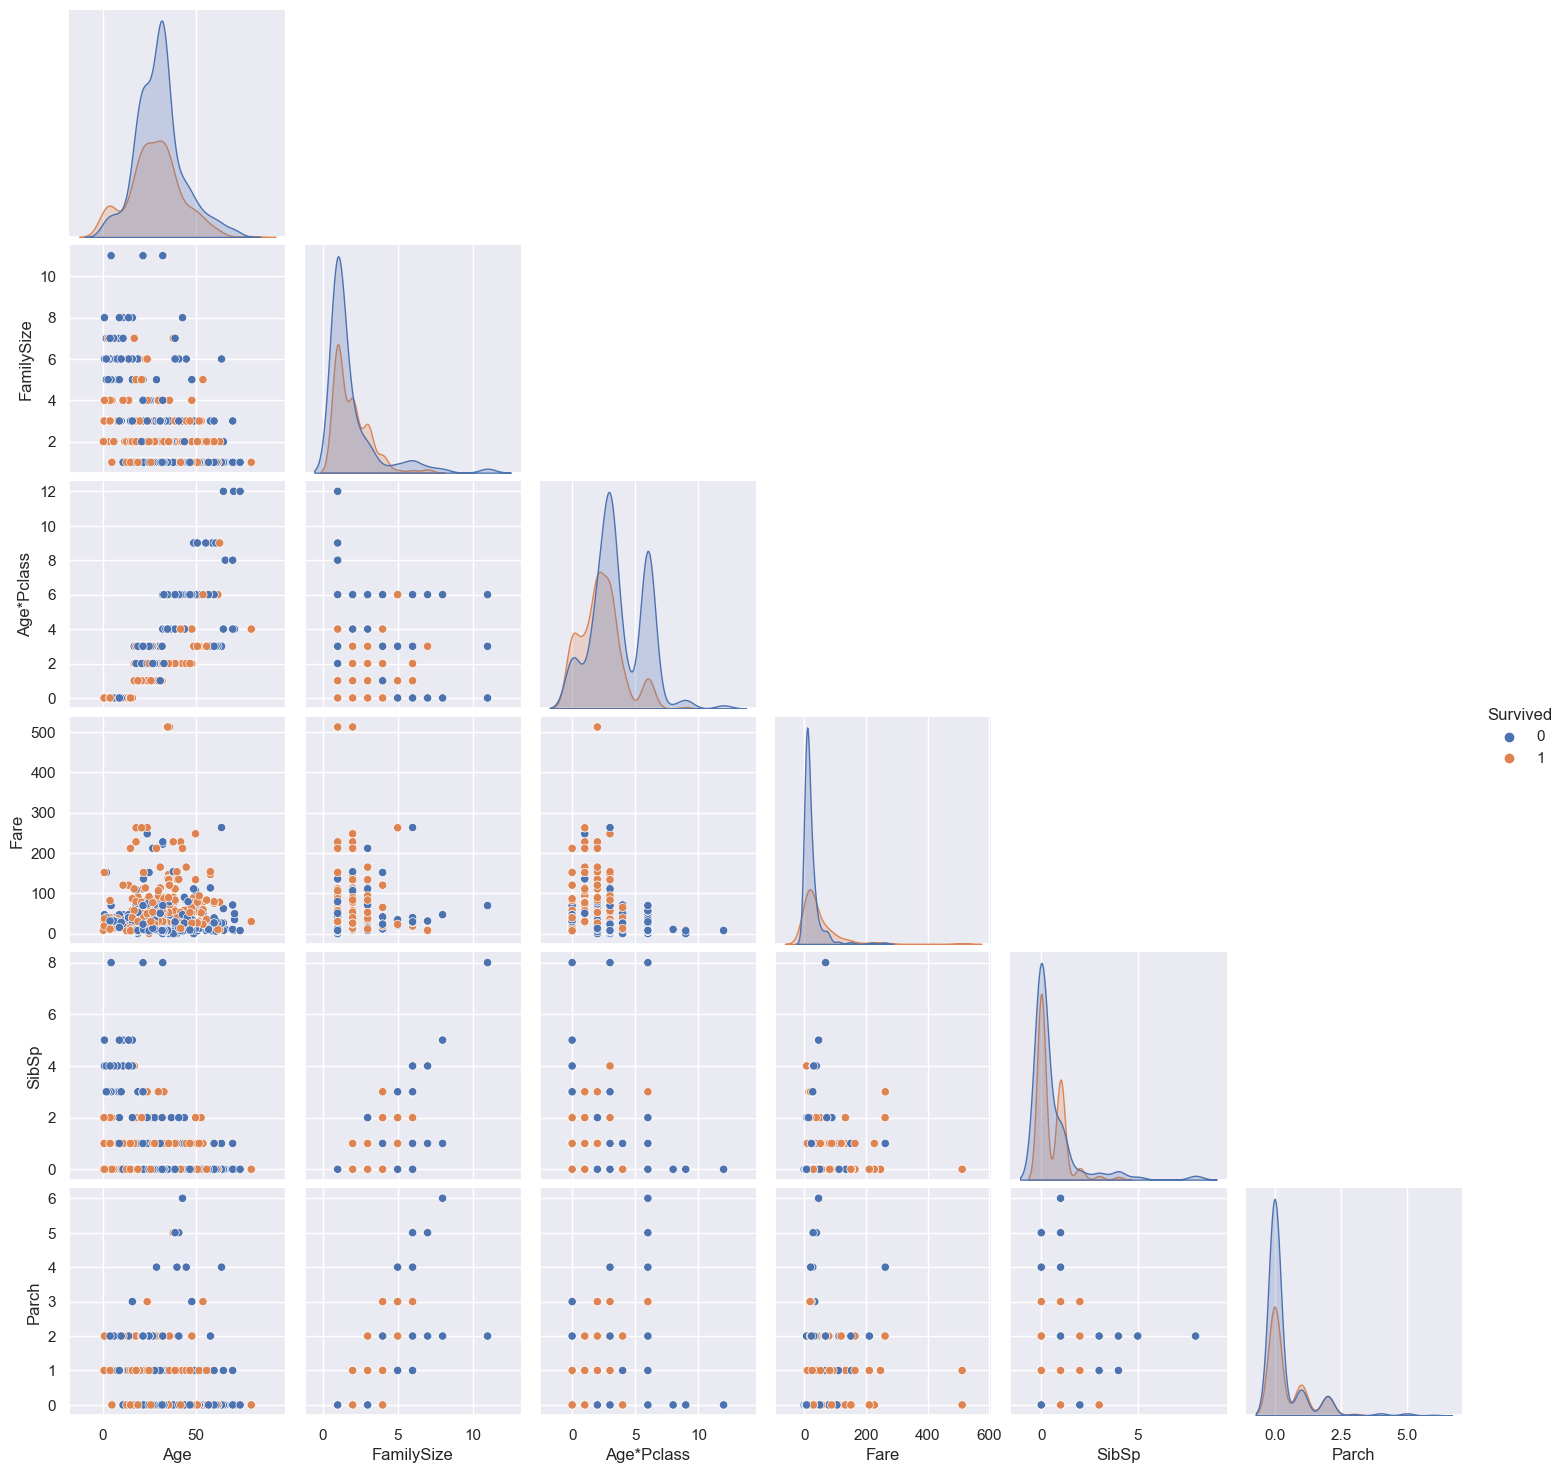

In [34]:
sns.set(rc={'figure.figsize':(25,15)})
sns.pairplot(X.loc[:,['Age', 'FamilySize', 'Age*Pclass', 'Fare', 'SibSp', 'Parch', 'Survived']], hue="Survived", corner=True)
plt.show()

### Violin plot
Documentation: https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot

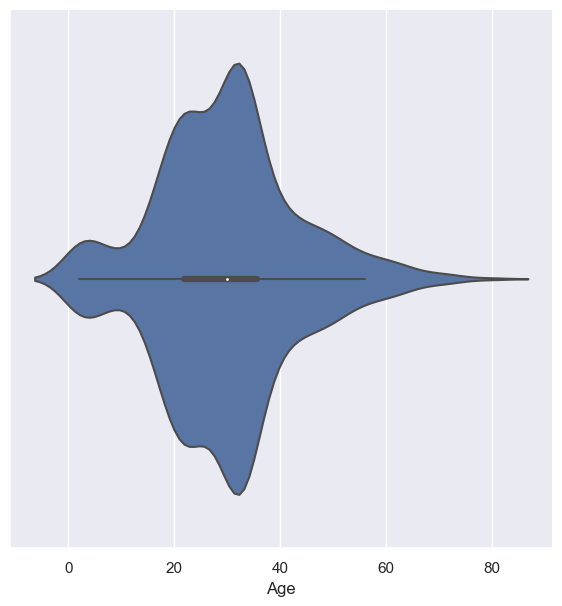

In [35]:
sns.set(rc={'figure.figsize':(7,7)})
sns.violinplot(x=X.Age)
plt.show()

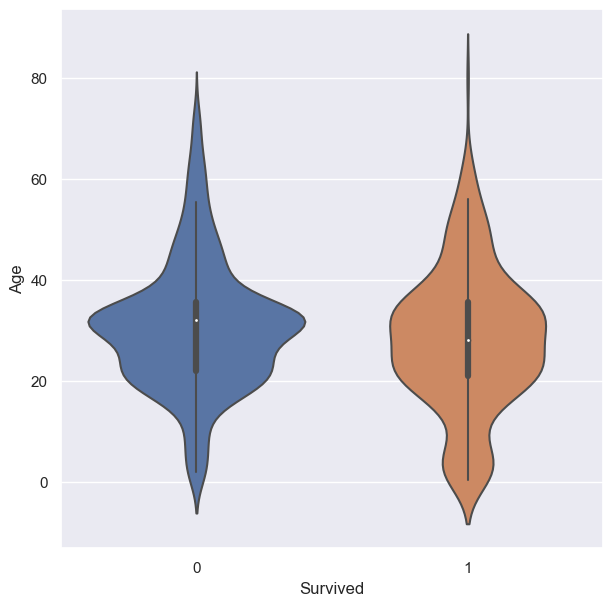

In [36]:
sns.violinplot(x="Survived", y="Age", data=X)
plt.show()

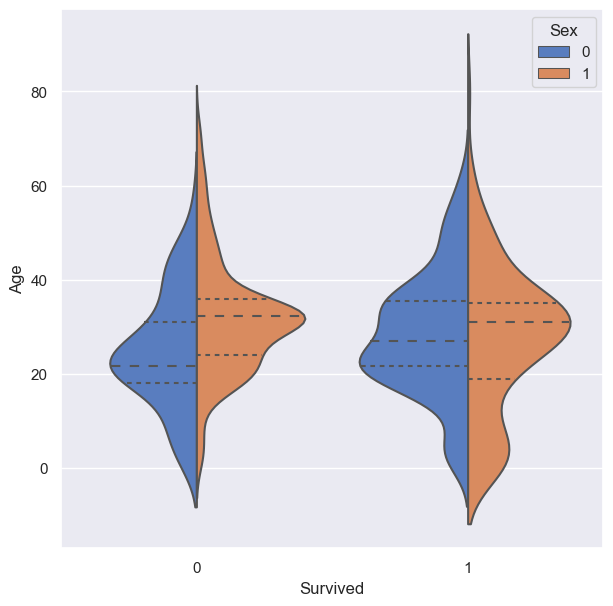

In [37]:
sns.violinplot(x="Survived", y="Age", hue="Sex", data=X, palette="muted", split=True, inner="quartile")
plt.show()

### Non-overlapping scatter plot (swarm plot)
Documentation: https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot  
If we look at the scatter plot for the Age and Sex features, we see a very small number of points. This is because a large number of points are located in the same place and in such cases we can use a non-overlapping scatter plot (called swarm plot).

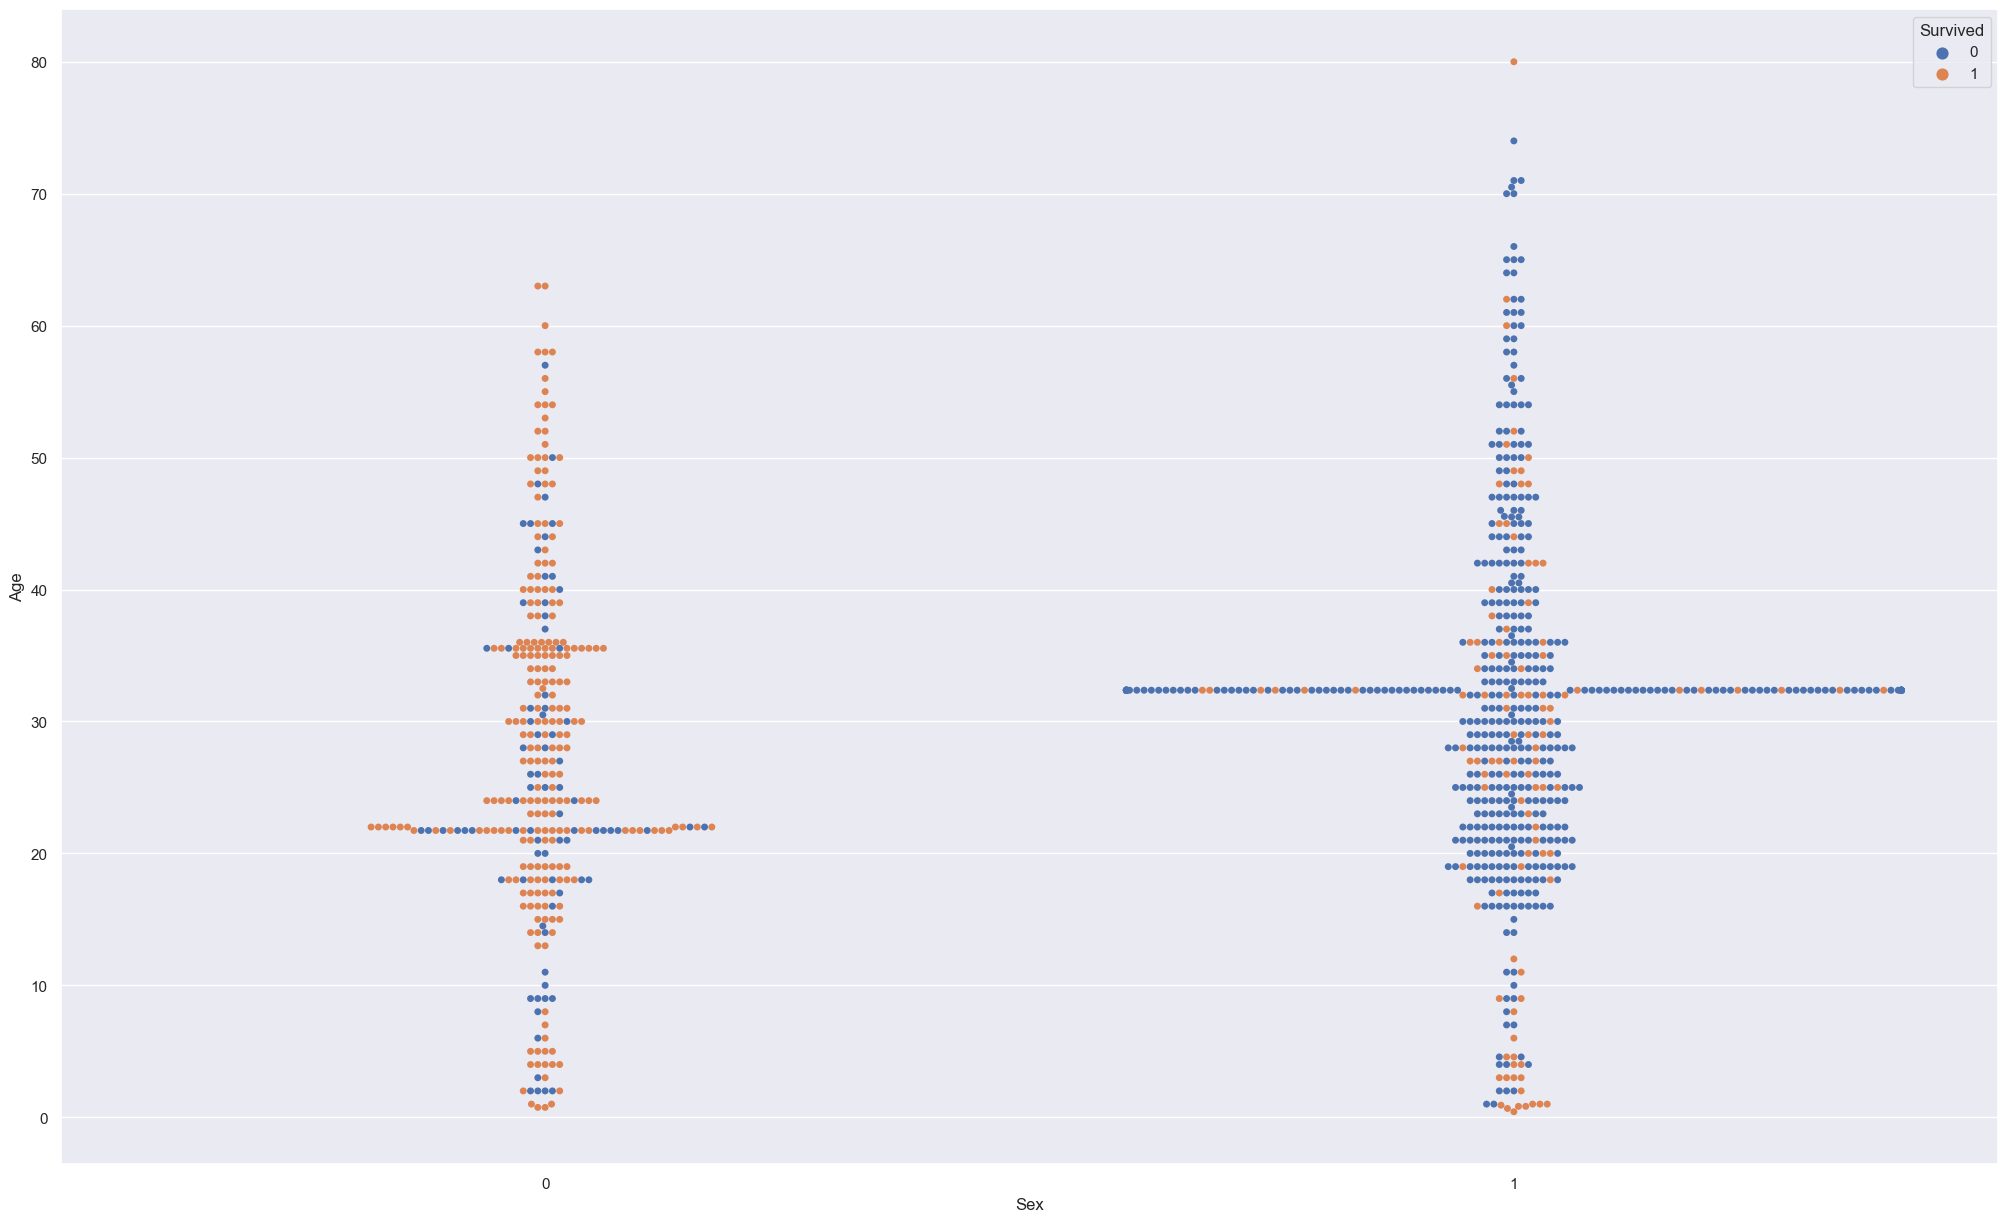

In [38]:
sns.set(rc={'figure.figsize':(25,15)})
sns.swarmplot(x='Sex', y="Age", data=X, hue="Survived")
plt.show()

### Joint plot
Documentation: https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot

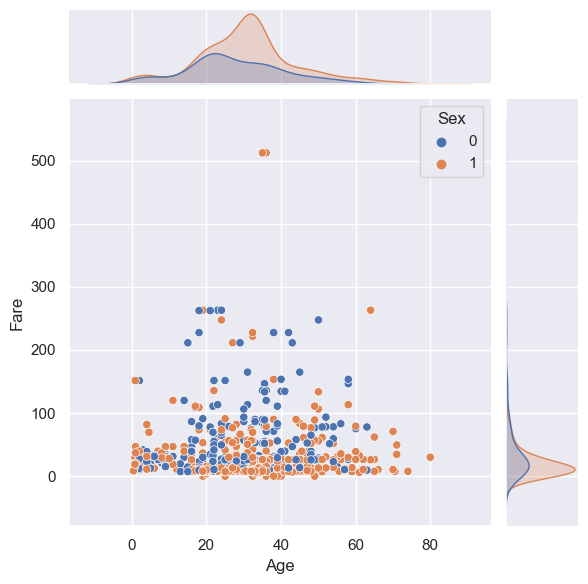

In [39]:
sns.jointplot(data=X, x="Age", y="Fare", hue="Sex")
plt.show()

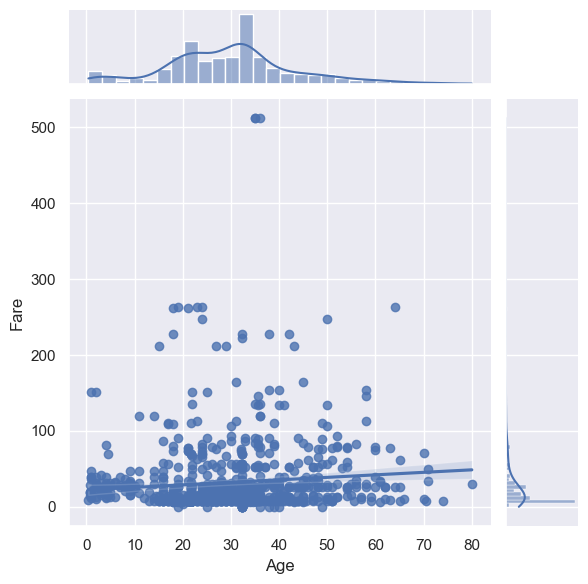

In [40]:
sns.jointplot(data=X, x="Age", y="Fare",kind="reg")
plt.show()

### Additional examples
https://seaborn.pydata.org/examples/index.html

# Conclusion
If you need some standard display, it’s easier and faster to use Seaborn, and if you need to make some specific non-standard display, then Matplotlib is a better option.